In [1]:
import sys
sys.path.append("../")

In [2]:
import numpy as np
import scipy.spatial.distance

In [3]:
import alphatsp
import alphatsp.tsp
import alphatsp.util

In [4]:
def nearest_insertion(tsp):
    
    distances = scipy.spatial.distance.pdist(tsp.points, metric="euclidean")
    distances = scipy.spatial.distance.squareform(distances)
    np.fill_diagonal(distances, np.inf)

    adj = np.zeros((tsp.n, tsp.n), dtype=np.bool)
    start_node = np.argmax(distances[0, 1:]) + 1
    adj[0, start_node] = 1
    adj[start_node, 0] = 1

    nontour_nodes = set(range(tsp.n))
    tour_nodes = list()

    nontour_nodes.remove(0)
    nontour_nodes.remove(start_node)
    tour_nodes.append(0)
    tour_nodes.append(start_node)

    while nontour_nodes:
        
        best_dist = np.inf
        s = -1
        
        for i in nontour_nodes:
            
            dists = distances[i, tour_nodes]
            opt_ind = np.argmin(dists)
            opt_dist = dists[opt_ind]
            
            if opt_dist < best_dist:
                best_dist = opt_dist
                s = i
                
        tour_nodes.append(s)
        nontour_nodes.remove(s)
        
        best_dist = np.inf
        e = (-1, -1)
        
        for j in tour_nodes:
        
            v_prev = np.argmax(adj[:,j])
            v_next = np.argmax(adj[j,:])

            inc1 = distances[v_prev, s] + distances[s, j] - distances[v_prev, j]
            inc2 = distances[j, s] + distances[s, v_next] - distances[j, v_next]
            
            if inc1 < best_dist or inc2 < best_dist:
                if inc1 <= inc2:
                    e = (v_prev, j)
                    best_dist = inc1
                else:
                    e = (j, v_next)
                    best_dist = inc2
                
        v_prev, v_next = e
        adj[v_prev, s] = 1
        adj[s, v_next] = 1
        adj[v_prev, v_next] = 0

    tour = [0]
    while len(tour) <= tsp.n:
        tour.append(np.argmax(adj[tour[-1], :]))

    return tour

In [5]:
def farthest_insertion(tsp):
    
    distances = scipy.spatial.distance.pdist(tsp.points, metric="euclidean")
    distances = scipy.spatial.distance.squareform(distances)
    np.fill_diagonal(distances, np.inf)

    adj = np.zeros((tsp.n, tsp.n), dtype=np.bool)
    start_node = np.argmax(distances[0, 1:]) + 1
    adj[0, start_node] = 1
    adj[start_node, 0] = 1

    nontour_nodes = set(range(tsp.n))
    tour_nodes = list()

    nontour_nodes.remove(0)
    nontour_nodes.remove(start_node)
    tour_nodes.append(0)
    tour_nodes.append(start_node)

    while nontour_nodes:
        
        best_dist = 0
        s = -1
        
        for i in nontour_nodes:
            
            dists = distances[i, tour_nodes]
            opt_ind = np.argmax(dists)
            opt_dist = dists[opt_ind]
            
            if opt_dist > best_dist:
                best_dist = opt_dist
                s = i
                
        tour_nodes.append(s)
        nontour_nodes.remove(s)
        
        best_dist = np.inf
        e = (-1, -1)
        
        for j in tour_nodes:
        
            v_prev = np.argmax(adj[:,j])
            v_next = np.argmax(adj[j,:])

            inc1 = distances[v_prev, s] + distances[s, j] - distances[v_prev, j]
            inc2 = distances[j, s] + distances[s, v_next] - distances[j, v_next]
            
            if inc1 < best_dist or inc2 < best_dist:
                if inc1 <= inc2:
                    e = (v_prev, j)
                    best_dist = inc1
                else:
                    e = (j, v_next)
                    best_dist = inc2
                
        v_prev, v_next = e
        adj[v_prev, s] = 1
        adj[s, v_next] = 1
        adj[v_prev, v_next] = 0

    tour = [0]
    while len(tour) <= tsp.n:
        tour.append(np.argmax(adj[tour[-1], :]))

    return tour

In [6]:
tsp = alphatsp.tsp.TSP(100, 2)

In [7]:
nearest_tour = nearest_insertion(tsp)
nearest_distance = tsp.tour_length(nearest_tour)

In [8]:
print(nearest_tour)
print(nearest_distance)

[0, 79, 2, 9, 4, 82, 51, 92, 15, 30, 43, 35, 3, 41, 17, 25, 33, 18, 84, 6, 48, 62, 71, 20, 61, 73, 11, 49, 91, 54, 26, 72, 65, 22, 37, 70, 77, 89, 50, 53, 96, 13, 88, 5, 60, 78, 8, 14, 34, 63, 23, 87, 99, 81, 85, 29, 86, 93, 39, 58, 74, 83, 68, 94, 52, 57, 7, 40, 80, 47, 76, 66, 32, 55, 10, 16, 19, 67, 75, 64, 69, 95, 59, 56, 44, 1, 24, 31, 98, 97, 42, 12, 90, 46, 45, 38, 27, 36, 21, 28, 0]
8.967802615895572


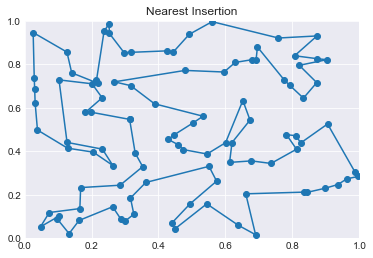

In [9]:
alphatsp.util.display_tour(tsp, nearest_tour, title="Nearest Insertion")

In [10]:
farthest_tour = farthest_insertion(tsp)
farthest_distance = tsp.tour_length(farthest_tour)

In [11]:
print(farthest_tour)
print(farthest_distance)

[0, 45, 42, 12, 46, 79, 90, 4, 82, 51, 15, 30, 92, 43, 35, 3, 9, 2, 18, 33, 41, 17, 25, 62, 71, 48, 20, 61, 73, 11, 6, 84, 13, 8, 14, 34, 63, 23, 78, 88, 96, 53, 49, 91, 54, 26, 72, 65, 22, 50, 70, 89, 77, 37, 52, 94, 68, 57, 40, 80, 7, 47, 76, 66, 83, 74, 58, 39, 93, 60, 5, 99, 87, 81, 86, 32, 55, 10, 16, 19, 67, 75, 64, 69, 1, 44, 56, 95, 29, 85, 59, 27, 38, 24, 31, 98, 97, 21, 28, 36, 0]
8.219695811075367


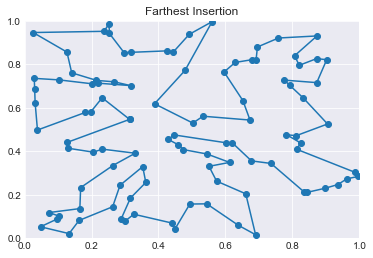

In [12]:
alphatsp.util.display_tour(tsp, farthest_tour, title="Farthest Insertion")